In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede
utilizar el enfoque que prefiera.

Text(0.5, 1.0, 'Imagen binarizada')

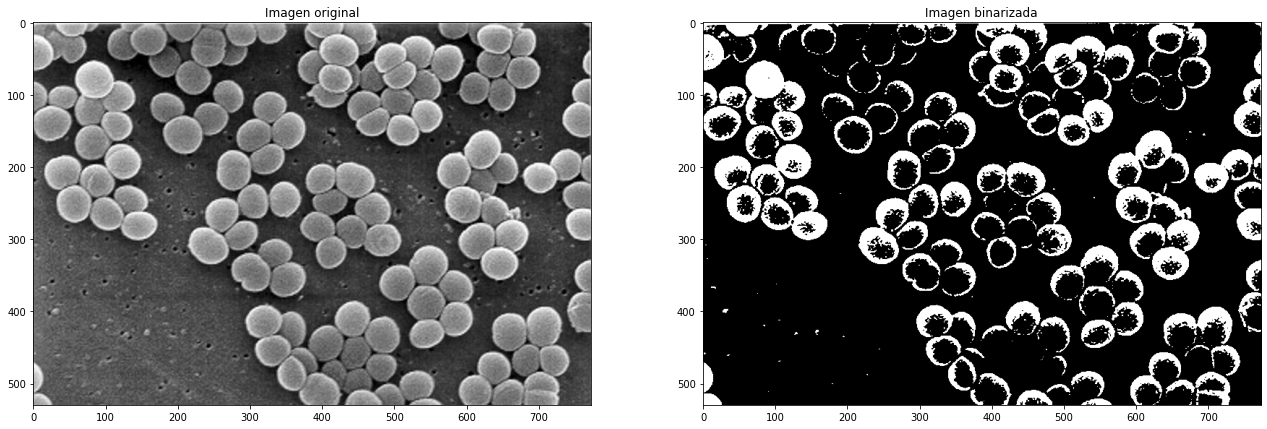

In [2]:
def binarize(img:np.ndarray, thresh:int=128) -> np.ndarray:
    """
    Binarizar una imagen, se presupone que la imagen es de escala de grises
    """
    return (img > thresh).astype(np.uint8) * 255


# leer imagen y binarizar
bacterias = cv2.imread('../imagenes/staphylococcus.jpg', cv2.IMREAD_GRAYSCALE)
bacterias_bin = binarize(bacterias, thresh=150) 

# desplegar
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
axes[0].imshow(bacterias, cmap='gray')
axes[0].set_title('Imagen original')
axes[1].imshow(bacterias_bin, cmap='gray')
axes[1].set_title('Imagen binarizada')


## Problema 2

Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar
la imagen a escala de grises y luego binarizarla.



Text(0.5, 1.0, 'XOR')

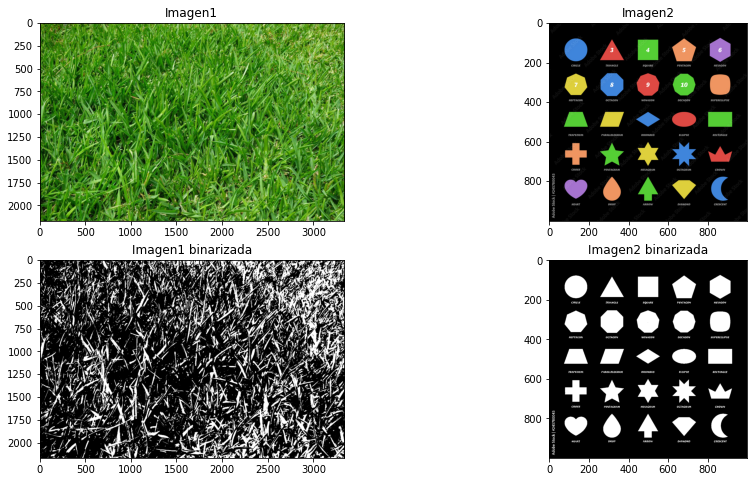

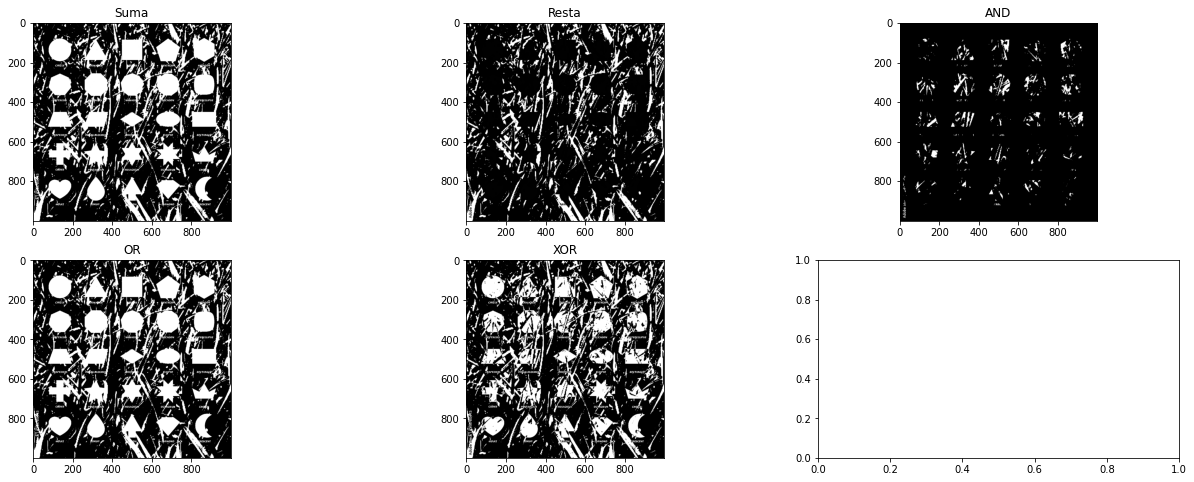

In [3]:
class ImagenBooleana:
    def __init__(self, img:np.ndarray, thresh:int=128):
        self.img = img
        self.thresh = thresh
        # convertir img a escala de grises
        self.img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # binarizar
        self.binarized = binarize(self.img_gris, thresh=thresh)

    def _crop_to_match(self, img1:np.ndarray, img2:np.ndarray) -> tuple[np.ndarray, np.ndarray]:
        """Corta cualquiera entra las 2 imagenes para que sean del mismo tamaño que la mas pequeña"""
        if img1.shape[0] > img2.shape[0]:
            img1 = img1[:img2.shape[0], :]
        else:
            img2 = img2[:img1.shape[0], :]
        if img1.shape[1] > img2.shape[1]:
            img1 = img1[:, :img2.shape[1]]
        else:
            img2 = img2[:, :img1.shape[1]]
        return img1, img2

    def __add__(self, other) -> np.ndarray:
        """suma de dos imagenes booleanas"""
        img1, img2 = self._crop_to_match(self.binarized, other.binarized)
        return img1 + img2

    def __sub__(self, other) -> np.ndarray:
        """resta de dos imagenes booleanas"""
        img1, img2 = self._crop_to_match(self.binarized, other.binarized)
        return img1 - img2

    def __and__(self, other) -> np.ndarray:
        """operador and de dos imagenes booleanas"""
        img1, img2 = self._crop_to_match(self.binarized, other.binarized)
        return img1 & img2
    
    def __or__(self, other) -> np.ndarray:
        """operador or de dos imagenes booleanas"""
        img1, img2 = self._crop_to_match(self.binarized, other.binarized)
        return img1 | img2

    def __xor__(self, other) -> np.ndarray:
        """operador xor de dos imagenes booleanas"""
        img1, img2 = self._crop_to_match(self.binarized, other.binarized)
        return img1 ^ img2

img1 = cv2.imread('../imagenes/grama.jpg')
img2 = cv2.imread('../imagenes/shapes.jpg')
# mostrar operaciones booleanas
img1_booleana = ImagenBooleana(img1)
img2_booleana = ImagenBooleana(img2, thresh=100)

# mostrar ambas imagenes orginales
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes[0][0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0][0].set_title('Imagen1')
axes[0][1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0][1].set_title('Imagen2')
axes[1][0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[1][0].set_title('Imagen1 binarizada')
axes[1][0].imshow(img1_booleana.binarized, cmap='gray')
axes[1][1].set_title('Imagen2 binarizada')
axes[1][1].imshow(img2_booleana.binarized, cmap='gray')



# mostrar imagenes tratadas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))

# suma
img_suma = img1_booleana + img2_booleana
axes[0][0].imshow(img_suma, cmap='gray')
axes[0][0].set_title('Suma')

# resta
img_resta = img1_booleana - img2_booleana
axes[0][1].imshow(img_resta, cmap='gray')
axes[0][1].set_title('Resta')

# and
img_and = img1_booleana & img2_booleana
axes[0][2].imshow(img_and, cmap='gray')
axes[0][2].set_title('AND')

# or
img_or = img1_booleana | img2_booleana
axes[1][0].imshow(img_or, cmap='gray')
axes[1][0].set_title('OR')

# xor
img_xor = img1_booleana ^ img2_booleana
axes[1][1].imshow(img_xor, cmap='gray')
axes[1][1].set_title('XOR')

## Problema 3

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

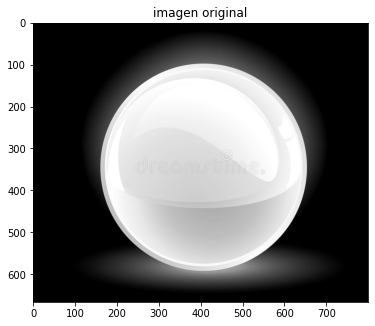

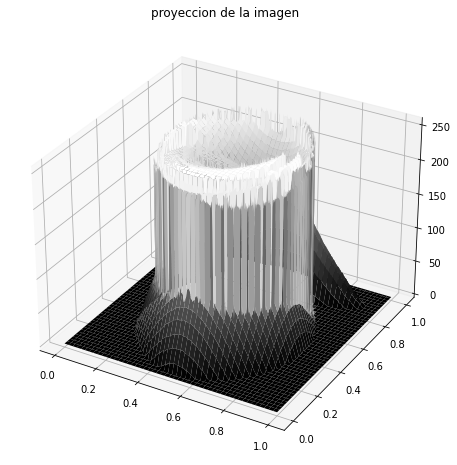

In [4]:
def plot_3d(img:np.ndarray, title:str):
    """plotea una imagen 3D"""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0, 1, img.shape[1]), np.linspace(0, 1, img.shape[0]))

    ax.plot_surface(X, Y, img, cmap='gray')
    ax.set_title(title)
    plt.show()

img = cv2.imread('../imagenes/esfera2.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('imagen original')

plot_3d(img, 'proyeccion de la imagen')


## Problema 4:

Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

Text(0.5, 1.0, 'Exponencial alpha=3, gamma=10')

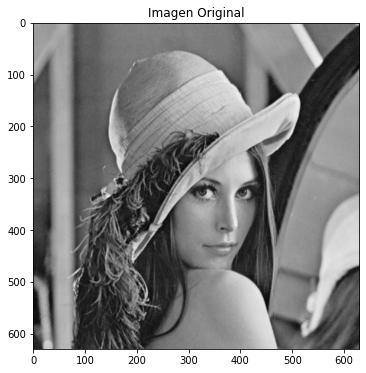

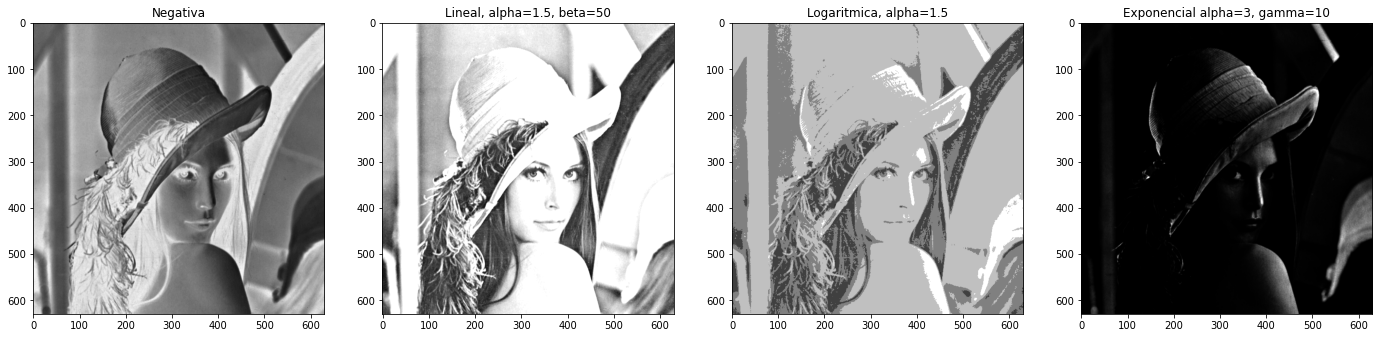

In [5]:
from dataclasses import dataclass


class Transformer:
    def __init__(self, img:np.ndarray):
        """Transformador de imagenes, se asume que la imagen esta en escala de grises"""
        self.img = img
    
    def clip_values(self, img:np.ndarray):
        """clipa los valores de la imagen al rango 0,255"""
        data = np.clip(img, 0, 255)
        return data.astype(np.uint8)
    
    def negativa(self) -> np.ndarray:
        """devuelve la imagen en negativa"""
        return 255 - self.img

    def lineal(self, alpha:float, beta:float) -> np.ndarray:
        """realiza una transformacion lineal con parametros alpha y beta"""
        data = alpha * self.img + beta
        return self.clip_values(data)
    
    def logaritmica(self, alpha:float) -> np.ndarray:
        """realiza una transformacion logaritmica con parametro de ganancia alpha"""
        data = alpha * np.log(self.img + 1)
        return self.clip_values(data)

    def exponencial(self, alpha:float, gamma:float) -> np.ndarray:
        """realiza una transformacion exponencial con parametros alpha y gamma"""
        data = (alpha * (self.img/255) ** gamma) * 255
        return self.clip_values(data)


img = cv2.imread('../imagenes/lena.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')

transformer = Transformer(img)

# mostrar imagenes tratadas
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
axes[0].imshow(transformer.negativa(), cmap='gray')
axes[0].set_title('Negativa')

axes[1].imshow(transformer.lineal(1.5, 50), cmap='gray')
axes[1].set_title('Lineal, alpha=1.5, beta=50')

axes[2].imshow(transformer.logaritmica(1.5), cmap='gray')
axes[2].set_title('Logaritmica, alpha=1.5')

axes[3].imshow(transformer.exponencial(3, 10), cmap='gray')
axes[3].set_title('Exponencial alpha=3, gamma=10')


## Problema 5:

Desarrolle una función que dada una imagen a color, cualquier kernel con cualquier dimensión
(3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano),
aplique un filtro de convolución a dicha imagen y muestre la imagen original y la imagen filtrada.
Le recomendamos implementar el kernel como un arreglo de numpy.

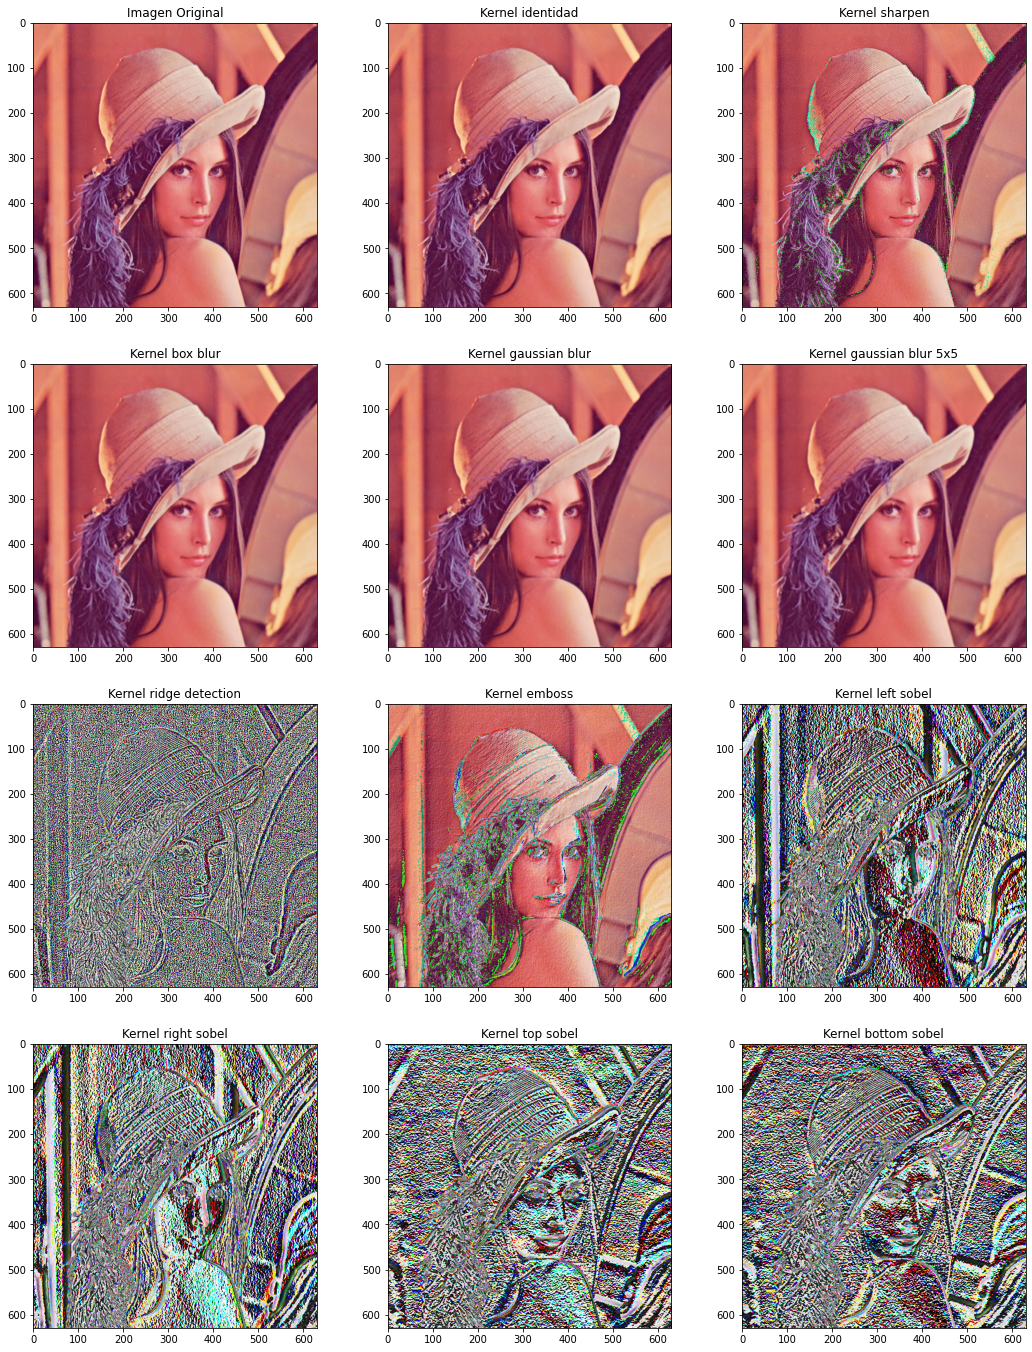

In [10]:
from scipy.ndimage import convolve

def convolucion(img:np.ndarray, kernel:np.ndarray) -> np.ndarray:
    """realiza una convolucion con un kernel"""
    # para cada canal de la imagen aplicar la convolucion, retornar la imagen completa
    return np.stack([convolve(img[:,:,i], kernel) for i in range(img.shape[2])], axis=2)

img = cv2.imread('../imagenes/lena.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# kernels
identity = np.array([
    [0, 0, 0], 
    [0, 1, 0], 
    [0, 0, 0]])

sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]])

box_blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]]) / 9

gaussian_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]]) / 16

gaussian_blur_5x5 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]]) / 256

gaussian_blur_11x11 = np.array([
    [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
    [0, 0, -1, -2, -4, -8, -9, -8, -4, -2, -1],
    [0, -1, -2, -4, -8, -12, -16, -12, -8, -4, -2],
    [-1, -2, -4, -8, -12, -18, -24, -18, -12, -8, -4],
    [-2, -4, -8, -12, -18, -24, -32, -24, -18, -12, -8],
    [-1, -2, -4, -8, -12, -18, -24, -18, -12, -8, -4],
    [0, -1, -2, -4, -8, -12, -16, -12, -8, -4, -2],
    [0, 0, -1, -2, -4, -8, -9, -8, -4, -2, -1],
    [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]]) / 256


ridge_detection = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]])

emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]]) 

left_sobel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

right_sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

top_sobel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])

bottom_sobel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])

# mostrar imagenes 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))
axes[0][0].set_title('Imagen Original')
axes[0][0].imshow(img, cmap='gray')

axes[0][1].set_title('Kernel identidad')
axes[0][1].imshow(convolucion(img, identity), cmap='gray')

axes[0][2].set_title('Kernel sharpen')
axes[0][2].imshow(convolucion(img, sharpen), cmap='gray')

axes[1][0].set_title('Kernel box blur')
axes[1][0].imshow(convolucion(img, box_blur), cmap='gray')

axes[1][1].set_title('Kernel gaussian blur')
axes[1][1].imshow(convolucion(img, gaussian_blur), cmap='gray')

axes[1][2].set_title('Kernel gaussian blur 5x5')
axes[1][2].imshow(convolucion(img, gaussian_blur_5x5), cmap='gray')

axes[2][0].set_title('Kernel ridge detection')
axes[2][0].imshow(convolucion(img, ridge_detection), cmap='gray')

axes[2][1].set_title('Kernel emboss')
axes[2][1].imshow(convolucion(img, emboss), cmap='gray')

axes[2][2].set_title('Kernel left sobel')
axes[2][2].imshow(convolucion(img, left_sobel), cmap='gray')

axes[3][0].set_title('Kernel right sobel')
axes[3][0].imshow(convolucion(img, right_sobel), cmap='gray')

axes[3][1].set_title('Kernel top sobel')
axes[3][1].imshow(convolucion(img, top_sobel), cmap='gray')

axes[3][2].set_title('Kernel bottom sobel')
axes[3][2].imshow(convolucion(img, bottom_sobel), cmap='gray')


## Problema 6:

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de
Canny para la detección de bordes.

El kernel laplaciano resalta el cambio rápido de intensidad en la imagen, usualmente se implementa con un kernel simpe de 3x3 y se basa en la formula:

$
\nabla^2f=\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}
$

A este kernel tambien se le suele llamar ridge_detect y existen 2 variantes bastante comunes:

Variante 1:

| 0  	| -1 	| 0  	|
|----	|----	|----	|
| -1 	| 4  	| -1 	|
| 0  	| -1 	| 0  	|

Variante 2:

| -1 	| -1 	| -1 	|
|----	|----	|----	|
| -1 	| 8  	| -1 	|
| -1 	| -1 	| -1 	|

Este kernel en si mismo es bastante suceptible a ruidos, ya que resalta bastante bien cualquier tipo de cambio en la intensidad, por este motivo es comunmente combinado con un kernel de suavizado gaussiano. Para reducir gasto computacional normalmente el kernel se convoluciona primero con un kernel gaussiano y luego se aplica a la imagen.

Veamos un ejemplo de la aplicación de este kernel:

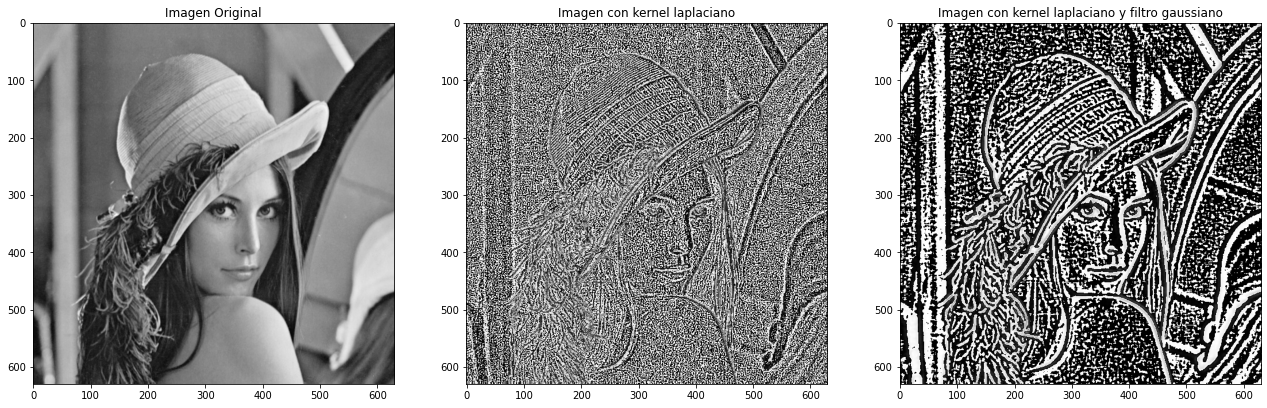

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8))
axes[0].set_title('Imagen Original')
axes[0].imshow(img, cmap='gray')
axes[1].set_title('Imagen con kernel laplaciano')
axes[1].imshow(convolucion(img, ridge_detection), cmap='gray')
axes[2].set_title('Imagen con kernel laplaciano y filtro gaussiano')
axes[2].imshow(convolucion(img, convolucion(gaussian_blur_11x11, ridge_detection)), cmap='gray')


Por su parte, Canny es un algoritmo bastante mas complejo que involucra varios pasos:

1. Aplicar un filtro gaussiano de ruido
2. Calcular la magnitud de las derivadas en X y Y
3. NMS, Non Maxima Supression
4. Double Threshold
5. Edge trackin by hysteresis

En conjunto resaltan las areas con mayor cambio y elimina por completo los cambios menores, en varios pasos tomando la imagen completa en cuenta.

Como resultado se tiene una deteccion de bordes bastante buena pero computacionalmente compleja. Veamos un ejemplo:

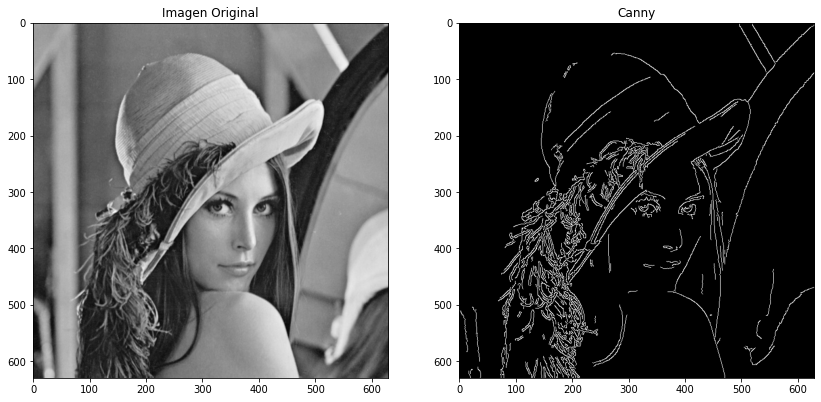

In [8]:
img_canny = cv2.Canny(img, 100, 200)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
axes[0].set_title('Imagen Original')
axes[0].imshow(img, cmap='gray')
axes[1].set_title('Canny')
axes[1].imshow(img_canny, cmap='gray')


## Problema Extra

Implemente una función que sugiera si una imagen en escala de grises requiere o no la ecualización
de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significaría que la imagen
no requiere ecualización y 1 significaría que la imagen requiere ecualización fuertemente, si el valor
es mayor a 0.5 su función debe realizar la ecualización de histograma vista en clase.

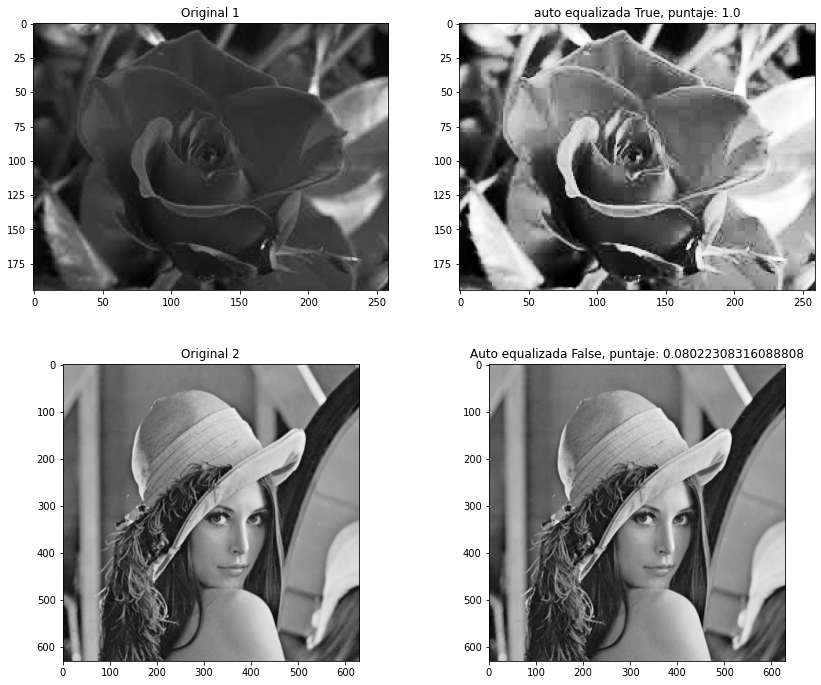

In [9]:
from enum import auto
import scipy.stats as st

def should_equalize(img:np.ndarray) -> float:
    """Puntar la imagen de acuerdo a si necesita ser equalizada, 0 no equalizar, 1 equalizar fuertemente"""
    img_1d = img.flatten() 
    # calcular basado en skewness
    skewness = st.skew(img_1d)
    # retornar siempre un valor entre 0 y 1
    skewness = np.clip(abs(skewness), 0, 1) 
    return skewness

def auto_equalize(img:np.ndarray) -> np.ndarray:
    """Equalizar la imagen si lo necesita, con la equalizacion de histograma"""
    if should_equalize(img) > 0.5:
        return cv2.equalizeHist(img)
    return img

img = cv2.imread('../imagenes/dark_rose.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../imagenes/lena.jpg', cv2.IMREAD_GRAYSCALE)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
ax[0][0].set_title('Original 1')
ax[0][0].imshow(img, cmap='gray')
ax[0][1].set_title('auto equalizada {}, puntaje: {}'.format(should_equalize(img)>0.5, should_equalize(img)))
ax[0][1].imshow(auto_equalize(img), cmap='gray')
ax[1][0].set_title('Original 2')
ax[1][0].imshow(img2, cmap='gray')
ax[1][1].set_title('Auto equalizada {}, puntaje: {}'.format(should_equalize(img2)>0.5, should_equalize(img2)))
ax[1][1].imshow(auto_equalize(img2), cmap='gray')